<a href="https://colab.research.google.com/github/aldonat/SC-MachineLearning-dan-DeepLearning/blob/main/Supervised_Classification_plus_Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `HR_comma_sep.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
import pandas as pd
import numpy as np

## Input Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HR_comma_sep%20-%20HR_comma_sep.csv')

In [ ]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14802,0.66,0.67,2,255,3,0,1,0,technical,low
6581,0.99,0.54,4,236,4,0,0,0,sales,low
3751,0.93,0.86,4,169,4,0,0,0,sales,low
14817,0.38,0.56,2,161,3,0,1,0,RandD,medium
2637,0.50,0.49,3,214,3,0,0,0,technical,medium


## Preprocessing

In [ ]:
df = pd.get_dummies(df)

In [ ]:
X = df.drop(['left'], axis=1)
y = df['left']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [ ]:
X_transform = pd.DataFrame(X_transform,columns = X.columns)

In [ ]:
X_transform.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.2, random_state = 123)

# Modeling

Pada bagian ini, kita akan menerapkan dengan bahasa python beberapa model yang telah kita pelajari yaitu :
1. k-Nearest Neighbor
2. Decision Tree
3. Logistic Regression
    
Beserta akan ada contoh **tuning hyperparameter** untuk svm dan ensemble

## k-Nearest Neighbor

k-Nearest Neighbor merupakan pemodelan yang memiliki konsep <br>
**bergantung terhadap tetangga terdekatnya**.<br>
Sehingga mampu mengklasifikasi dengan baik.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def evaluasi_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

evaluasi_model(knn,X_test,y_test)

0.9406666666666667

In [ ]:
evaluasi_model(knn,X_train,y_train)

0.9612467705642137

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

evaluasi_model(knn,X_test,y_test)

0.9503333333333334

In [ ]:
import pickle

with open('model_knn.pickle', 'wb') as handle:
    pickle.dump(knn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('model_knn.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
evaluasi_model(b,X_test,y_test)

0.9503333333333334

### Tuning Hyperparameter - KNN

In [ ]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]} # hati-hati pemilihan hyperparameter jangan terlalu banyak kombinasinya

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
             estimator=knn,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=10,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'n_neighbors': 2}

In [ ]:
evaluasi_model(grid,X_test,y_test)

0.962

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(grid, X_train, y_train, cv=5)

# Print accuracy for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")

# Print average accuracy across all folds
print(f"Average Accuracy: {cv_scores.mean()}")

Fold 1 Accuracy: 0.9495833333333333
Fold 2 Accuracy: 0.9625
Fold 3 Accuracy: 0.9558333333333333
Fold 4 Accuracy: 0.95875
Fold 5 Accuracy: 0.9608170070862859
Average Accuracy: 0.9574967347505906


## LEARNING CURVE

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

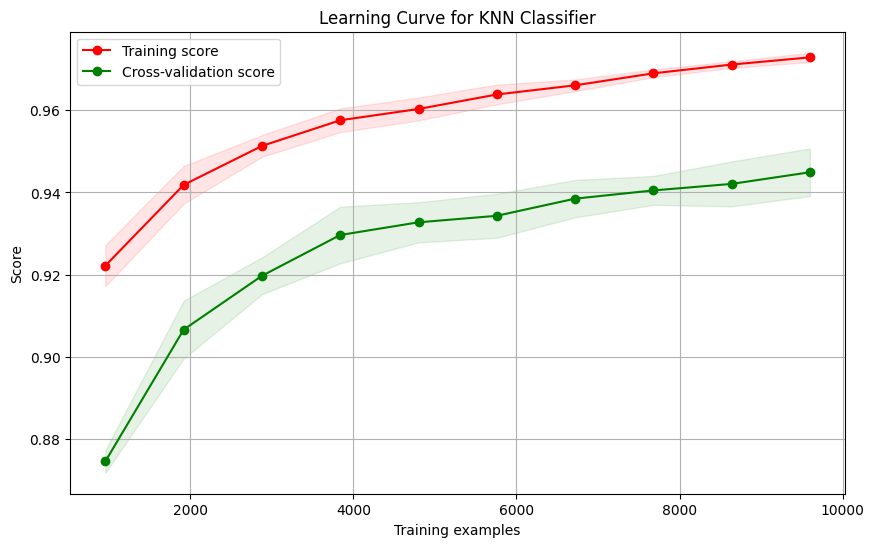

In [ ]:
# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for KNN Classifier")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2291
           1       0.92      0.92      0.92       709

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



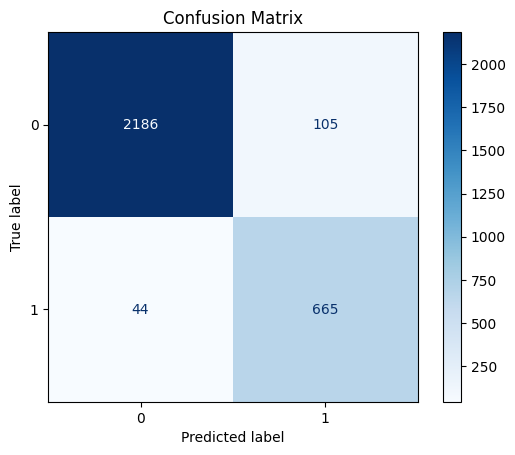

In [ ]:
#Generate Confussion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = knn.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

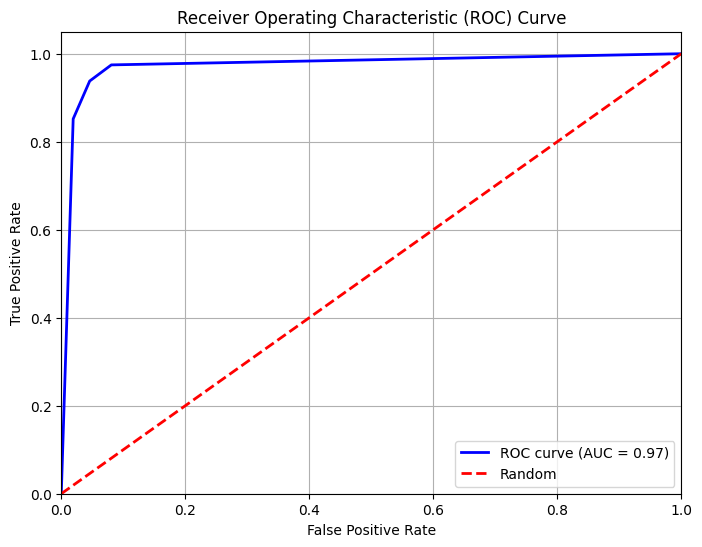

In [ ]:
#Generate ROC Curve
from sklearn.metrics import roc_curve, auc

# Predict probabilities for positive class
y_probs = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Decision Tree

Decision Tree merupakan pemodelan dengan cara membuat sebuah **pohon keputusan** <br>
Pohon ini bisa kita atur kedalamannya.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
evaluasi_model(dtc,X_train,y_train)

1.0

In [ ]:
evaluasi_model(dtc,X_test,y_test)

0.983

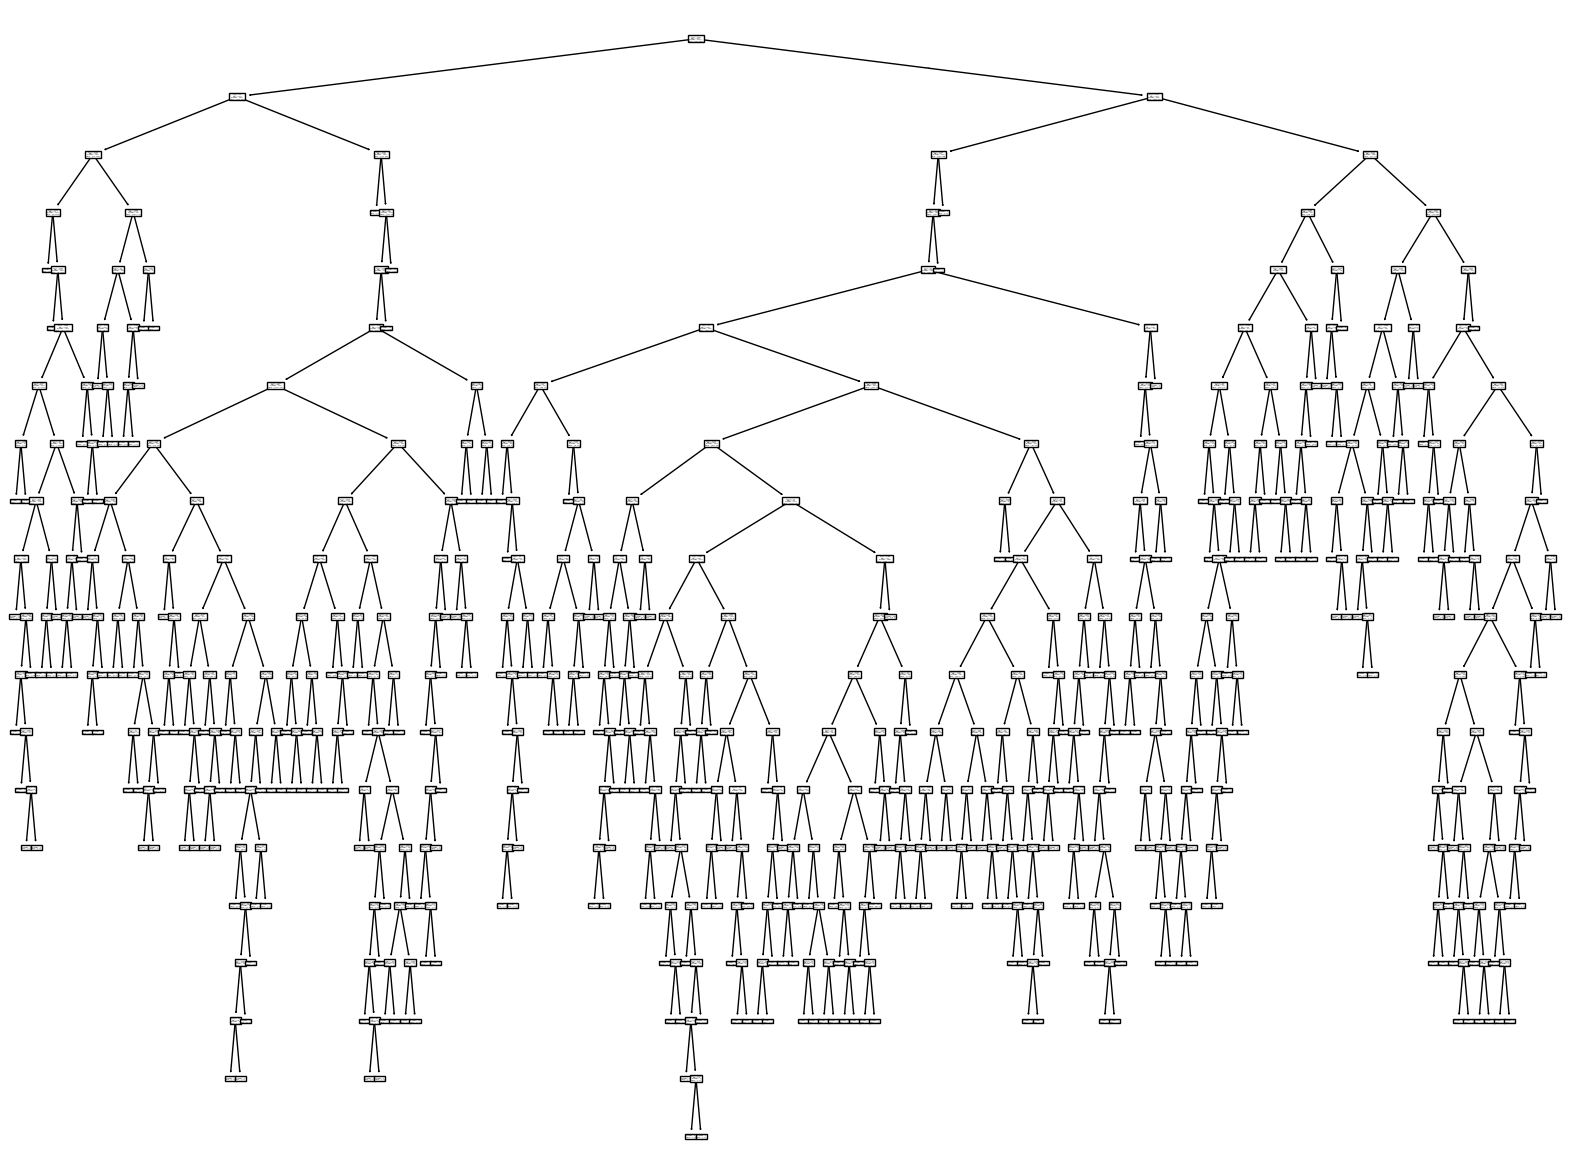

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the decision tree on the axes
tree.plot_tree(dtc, ax=ax)

# Display the figure
plt.show()

In [ ]:
params = {'max_depth':[3,5,7,9,11,'max']} # hati-hati pemilihan hyperparameter jangan terlalu banyak kombinasinya

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=dtc,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 'max']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'max_depth': 11}

In [ ]:
evaluasi_model(grid,X_train,y_train)

0.9895824652054338

In [ ]:
evaluasi_model(grid,X_test,y_test)

0.982

## Logistic Regression

Decision Tree merupakan pemodelan dengan menggunakan konsep **regresi** <br>
Namun regresi yang digunakan adalah regresi yang telah ditransformasi untuk variable targetnya.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
evaluasi_model(logreg,X_train,y_train)

0.7934827902325193

In [ ]:
evaluasi_model(logreg,X_test,y_test)

0.789

In [ ]:
params = {'C':[0.1,0.5,1,2,3]} # hati-hati pemilihan hyperparameter jangan terlalu banyak kombinasinya

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
             estimator=logreg,
             param_grid=params,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': [0.1, 0.5, 1, 2, 3]}, scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 3}

In [ ]:
evaluasi_model(grid,X_train,y_train)

0.7936494707892324

In [ ]:
evaluasi_model(grid,X_test,y_test)

0.7896666666666666